# Data-Driven Fundraising Insights for MWPCCC

**Author:** Geneva Burleigh 
**Date:** 1/09/25 - 2/17/25  
**Project:** Analyzing Donor & Fundraising Data to Improve Financial Sustainability  

---

## 1. Objective

This report analyzes historical donor and fundraiser data to evaluate the effectiveness of fundraising efforts for MWPCCC. By leveraging a structured PostgreSQL database, we assess **donor engagement trends, fundraising performance, and overall financial sustainability**.

Key areas of focus include:

1️⃣ **Total fundraising revenue over time** – How much has MWPCCC raised annually?  
2️⃣ **Fundraiser effectiveness** – Which types of fundraisers generate the most revenue?  
3️⃣ **Donor retention & behavior** – Are donors giving repeatedly, or is engagement declining?  
4️⃣ **Large donor impact** – How reliant is MWPCCC on a few high-value donors?  
5️⃣ **Predictive insights** – What trends can guide future fundraising strategies?  

While a full break-even analysis requires additional financial data from QuickBooks and ADP, current trends indicate that recent fundraising efforts have not been enough to sustain MWPCCC. This report aims to identify gaps and opportunities in donor engagement and fundraising strategy to support future financial planning.  

---

## 2. Data Sources

This report is built using structured fundraising and donor data migrated from Google Sheets into PostgreSQL. Data sources include:

- **Donor Records:** Originally compiled from Procare, Mailchimp, and manual records. Now structured into a centralized database.
- **Fundraiser History:** Historical records from internal documentation, detailing revenue, costs, and participation.
- **Donation Tracking:** Transaction-level donation data, aggregated by donor and fundraiser.

All data has been **cleaned, standardized, and structured** to allow for reliable trend analysis and reporting.

---

## 3. Data Migration Process

To ensure consistency and accuracy, we implemented a **structured data migration process** from Google Sheets to PostgreSQL. This process involved:

### 3.1 Extracting & Cleaning Data
- Removed duplicate and inconsistent records.
- Standardized donor names, addresses, and donation formats.
- Anonymized sensitive donor information for privacy.

### 3.2 Structuring Data for PostgreSQL
- Designed relational database schema with tables for **Giving Entities, Donations, Fundraisers, Fundraiser Costs, and Occupants**.
- Established primary and foreign key constraints to ensure data integrity.
- Addressed data inconsistencies and errors during the upload process.

### 3.3 Data Upload & Validation
- Converted Google Sheets data into CSV format for batch uploads.
- Used SQL scripts to import and validate records in PostgreSQL.
- Implemented automated checks to verify data accuracy post-migration.

This structured approach ensured that historical donor and fundraising data could be queried efficiently, enabling deeper insights and trend analysis.

### 3.4 Tools & Technologies Used

- **Google Sheets** – Initial data collection and organization.
- **Google Apps Script** – Automation for data structuring and cleaning.
- **PostgreSQL** – Database for storing structured donor and fundraising data.
- **pgAdmin** – Database management and SQL query execution.
- **Deepnote** – Data analysis and project documentation.
- **Python** – Used for advanced data processing and visualization.

---

## 4. Database Schema & Structure

The database schema was designed to efficiently store and query fundraising and donor data while maintaining referential integrity.

### 4.1 Tables & Relationships

| Table Name | Description | Primary Key | Foreign Keys |
|------------|------------|-------------|--------------|
| **giving_entities** | Stores family, individual, and corporate donor entities | `entity_id` | None |
| **occupants** | Tracks individuals associated with a giving entity | `occupant_full_name` | `entity_id` |
| **donations** | Tracks each donation, linking it to a donor and fundraiser | `donation_id` | `entity_id`, `fundraiser_id`, `occupant_full_name` |
| **fundraisers** | Records details of each fundraiser event | `fundraiser_id` | None |
| **fundraiser_costs** | Logs expenses associated with fundraisers | `cost_id` | `fundraiser_id` |

### 4.2 Constraints & Integrity
- **Primary Keys**: Each table has a unique primary key to ensure data integrity.
- **Foreign Keys**: Relationships between donations, fundraisers, and giving entities ensure proper linking of transactions.
- **Validation Rules**: The data migration process included checks for missing fields, duplicate entries, and incorrect formatting.

### 4.3 Lessons from Data Upload Failures
- Several errors were encountered due to missing constraints and formatting mismatches.
- Adjustments were made to align data formats and ensure referential integrity.
- Some constraints, such as foreign key relationships, required modification to match real-world data inconsistencies.

---

## 5. Key Reporting Metrics

To generate actionable insights, we will focus on the following key metrics:

### 5.1 Fundraising Performance
- **Total funds raised per year** (trend over time)
- **Top-performing fundraisers** (by revenue, donor count, and average donation)
- **Fundraiser success rate** (number of fundraisers meeting revenue goals)

### 5.2 Donor Engagement & Retention
- **Donor retention rate** (percentage of repeat donors)
- **New vs. returning donors per year**
- **Distribution of donation amounts** (small vs. large donors)
- **Largest single donations & largest cumulative donors**
- **Contribution breakdown by donor type** (individual vs. corporate giving)

### 5.3 Predictive Insights
- **Year-over-year comparison of donor count & revenue**
- **Seasonality trends** (best months/quarters for fundraising)
- **Growth opportunities** (patterns in donor engagement that indicate potential areas for increased outreach)

---

## 6. Methodology & SQL Queries

To extract these insights, we will use SQL queries to analyze structured fundraising and donor data. The following queries will be implemented:

1. **Total fundraising revenue per year**  
2. **Structured vs. Unstructured Donations**
3. **Fundraiser Type Effectiveness**
4. **Donor retention rate (repeat donors vs. one-time donors)**  
5. **Contribution breakdown by donor type (individual vs. corporate)**  
6. **Distribution of donation amounts (how much do people typically give?)**  
7. **Largest single donations & largest cumulative donors**  
8. **Year-over-year comparison of donor count and revenue**  

SQL queries were executed in Deepnote, retrieving data directly from Supabase PostgreSQL. Deepnote’s built-in visualization tools were used for straightforward charts, while Python (Pandas, Matplotlib, and Seaborn) was leveraged for more advanced visualizations, such as the donor retention heatmap and Pareto analysis. Query results were structured into Pandas DataFrames where additional processing and formatting were necessary.

---

### 6.1 Total Fundraising Revenue Per Year
To analyze fundraising trends over time, we calculated total funds raised per year.




In [1]:
df_1 = _dntk.execute_sql(
  'SELECT \n    EXTRACT(YEAR FROM donation_date) AS year,\n    SUM(amount) AS total_raised\nFROM donations\nGROUP BY year\nORDER BY year DESC;',
  'SQL_E4DCF937_C563_48B9_9A84_797D4F833EEA',
  audit_sql_comment='',
  sql_cache_mode='cache_disabled',
  return_variable_type='dataframe'
)
df_1

,year,total_raised
0,2024.0,3963.52
1,2023.0,1798.44
2,2022.0,6201.77
3,2021.0,14995.10
4,2020.0,29435.87
5,2019.0,35960.36
6,2018.0,29713.31
7,2017.0,17822.44
8,2016.0,22999.91
9,2015.0,23473.51


In [2]:
_dntk.DeepnoteChart(df_1, """{"layer":[{"layer":[{"mark":{"clip":true,"type":"trail","color":"#2266D3","tooltip":true},"encoding":{"x":{"axis":{"grid":false,"title":"Year"},"sort":null,"type":"quantitative","field":"year","scale":{"type":"linear","zero":false},"format":{"type":"default","decimals":null},"formatType":"numberFormatFromNumberType"},"y":{"axis":{"grid":false,"title":"Total Raised"},"sort":null,"type":"quantitative","field":"total_raised","scale":{"type":"linear","zero":false},"format":{"type":"default","decimals":null},"aggregate":"sum","formatType":"numberFormatFromNumberType"}}}]}],"title":"Donations since 2005","config":{"legend":{}},"$schema":"https://vega.github.io/schema/vega-lite/v5.json","encoding":{},"usermeta":{"tooltipDefaultMode":true}}""")

#### Total Fundraising Revenue Per Year
Donations have declined dramatically in recent years. Fundraising peaked in 2019, reaching over $35,000, before plummeting to nearly nothing by 2024.

While the COVID-19 pandemic likely contributed to the decline, the centers were only closed for a few months during the initial lockdowns. This suggests that additional factors—such as shifts in fundraising strategy, donor engagement, or organizational priorities—may have played a significant role in the drop. Understanding these factors is critical for rebuilding a sustainable fundraising model.

#### Top-Performing Fundraisers

This query calculates both total revenue (gross) and net revenue for each fundraiser by subtracting associated costs. It also pulls fundraiser type, status, and date range to provide more context.

In [3]:
df_2 = _dntk.execute_sql(
  'WITH fundraiser_revenue AS (\n    SELECT \n        fundraiser_id,\n        COUNT(donation_id) AS number_of_donations,\n        COALESCE(SUM(amount), 0) AS total_raised\n    FROM donations\n    GROUP BY fundraiser_id\n),\nfundraiser_expenses AS (\n    SELECT \n        fundraiser_id,\n        COALESCE(SUM(amount), 0) AS total_costs\n    FROM fundraiser_costs\n    GROUP BY fundraiser_id\n)\nSELECT \n    f.fundraiser_id,\n    f.type,\n    f.status,\n    f.date_started,\n    f.date_ended,\n    COALESCE(fr.number_of_donations, 0) AS number_of_donations,\n    COALESCE(fr.total_raised, 0) AS total_raised,\n    COALESCE(fe.total_costs, 0) AS total_costs,\n    (COALESCE(fr.total_raised, 0) - COALESCE(fe.total_costs, 0)) AS net_revenue\nFROM fundraisers f\nLEFT JOIN fundraiser_revenue fr ON f.fundraiser_id = fr.fundraiser_id\nLEFT JOIN fundraiser_expenses fe ON f.fundraiser_id = fe.fundraiser_id\nORDER BY net_revenue DESC\nLIMIT 10;\n',
  'SQL_E4DCF937_C563_48B9_9A84_797D4F833EEA',
  audit_sql_comment='',
  sql_cache_mode='cache_disabled',
  return_variable_type='dataframe'
)
df_2

,fundraiser_id,type,status,date_started,date_ended,number_of_donations,total_raised,total_costs,net_revenue
0,Unprompted,Direct Donation,Ongoing,2005-07-06,None,154,60734.97,0.00,60734.97
1,In Pat's Memory,Direct Donation,Completed,2018-12-20,2019-01-25,36,51368.55,0.00,51368.55
2,Midland Fundraiser,Percentage of purchase,Completed,2010-04-26,2017-10-23,25,13870.50,51.91,13818.59
3,Sun & Fun Family Picnic 2019,Park Gathering,Completed,2019-07-11,2019-07-11,25,13796.42,0.00,13796.42
4,Letter Campaign 2015,Mailer,Completed,2015-11-20,2016-04-30,14,12305.00,0.00,12305.00
5,Letter Campaign 2014,Mailer,Completed,2014-11-19,2015-06-05,25,11295.00,0.00,11295.00
6,Pat Griffith Scholarship Fund Creation,Mailer,Completed,2016-12-01,2017-01-25,34,11235.00,0.00,11235.00
7,Noise Remediation Fundraiser,Direct Donation,Completed,2011-04-18,2012-08-31,26,10992.50,48.09,10944.41
8,Sun & Fun Inaugural Family Picnic 2018,Park Gathering,Completed,2018-08-04,2018-08-04,13,10254.68,0.00,10254.68
9,Cafe Wednesdays,Direct Donation,Completed,2016-11-09,2019-09-27,116,9001.33,55.70,8945.63


In [4]:
_dntk.DeepnoteChart(df_2, """{"layer":[{"layer":[{"mark":{"clip":true,"type":"bar","tooltip":true},"encoding":{"x":{"axis":{"grid":false,"title":"Fundraisers"},"sort":null,"type":"nominal","field":"fundraiser_id","scale":{"type":"linear"}},"y":{"axis":{"grid":false,"title":"Total Raised"},"sort":null,"type":"quantitative","field":"total_raised","scale":{"type":"linear"},"format":{"type":"default","decimals":null},"aggregate":"sum","formatType":"numberFormatFromNumberType"},"color":{"sort":null,"type":"quantitative","field":"total_costs","scale":{"scheme":"purples"},"aggregate":"sum"}}}]}],"title":"Fundraiser Profitability","config":{"legend":{}},"$schema":"https://vega.github.io/schema/vega-lite/v5.json","encoding":{},"usermeta":{"tooltipDefaultMode":true}}""")

Before analyzing the top-performing fundraisers, it’s important to identify and account for anomalies in the data.

One clear outlier is the "Unprompted" category, which represents donations received outside of any official fundraising campaign since 2005. Unlike other fundraisers, which have defined start and end dates, this category accumulates donations continuously over time, making direct comparisons misleading.

**Why This Matters:**

Including this category inflates overall revenue totals and distorts fundraiser comparisons.
It does not represent an intentional fundraising effort with associated costs.
To accurately assess the effectiveness of fundraisers, this category should be excluded from certain performance comparisons.

**Action Taken:**

For a clearer picture of fundraiser effectiveness, we exclude "Unstructured Donations" when analyzing fundraiser type performance and cost efficiency. However, it remains valuable as a benchmark for understanding the organization’s baseline donation income.

### 6.2 Structured vs. Unstructured Donations

While unstructured donations are not directly comparable to formal fundraisers, they still play a crucial role in MWPCCC’s financial health. By overlaying total unstructured donations with fundraiser performance over time, we aim to uncover trends such as:

📊 Key Questions to Investigate:
✅ Do unstructured donations increase in years where formal fundraising campaigns underperform?
✅ Are there seasonal patterns in unstructured donations that align with fundraising efforts (e.g., year-end giving)?
✅ Have major organizational events (such as leadership changes or external crises) influenced unstructured donations?
✅ How much of MWPCCC’s annual fundraising revenue comes from unstructured giving vs. formal fundraising?

Next Steps:

📌 Generate a time-series visualization comparing annual unstructured donations with total fundraising revenue.
📌 Analyze peaks and dips to determine whether formal fundraisers drive unstructured donations or whether they compete for donor attention.

This analysis compares direct, unprompted donations against structured fundraising events. Our findings indicate that while organized fundraisers bring in significant revenue, a notable portion of donations come from community members who contribute outside formal fundraising efforts.


In [5]:
df_4 = _dntk.execute_sql(
  'WITH fundraiser_totals AS (\n    SELECT \n        EXTRACT(YEAR FROM d.donation_date) AS donation_year,\n        SUM(d.amount) AS fundraiser_revenue\n    FROM donations d\n    WHERE d.fundraiser_id != \'Unprompted\' -- Excludes unstructured donations\n    GROUP BY donation_year\n),\nunstructured_totals AS (\n    SELECT \n        EXTRACT(YEAR FROM d.donation_date) AS donation_year,\n        SUM(d.amount) AS unstructured_donations\n    FROM donations d\n    WHERE d.fundraiser_id = \'Unprompted\' -- Captures only unstructured donations\n    GROUP BY donation_year\n)\nSELECT \n    COALESCE(f.donation_year, u.donation_year) AS year,\n    COALESCE(f.fundraiser_revenue, 0) AS total_fundraiser_revenue,\n    COALESCE(u.unstructured_donations, 0) AS total_unstructured_donations\nFROM fundraiser_totals f\nFULL OUTER JOIN unstructured_totals u \n    ON f.donation_year = u.donation_year\nORDER BY year;\n\n',
  'SQL_E4DCF937_C563_48B9_9A84_797D4F833EEA',
  audit_sql_comment='',
  sql_cache_mode='cache_disabled',
  return_variable_type='dataframe'
)
df_4

,year,total_fundraiser_revenue,total_unstructured_donations
0,2005.0,8729.75,11376.10
1,2006.0,5442.63,18622.00
2,2007.0,13708.81,525.00
3,2008.0,20373.13,110.00
4,2009.0,20159.77,483.18
5,2010.0,15548.48,2508.00
6,2011.0,22094.43,1588.50
7,2012.0,25043.28,1232.53
8,2013.0,19955.21,1015.00
9,2014.0,20175.15,167.00


In [6]:
_dntk.DeepnoteChart(df_4, """{"layer":[{"layer":[{"mark":{"clip":true,"type":"trail","color":"#2266D3","tooltip":true},"encoding":{"x":{"axis":{"grid":false,"title":"Year"},"sort":null,"type":"quantitative","field":"year","scale":{"type":"linear","zero":false},"format":{"type":"default","decimals":null},"formatType":"numberFormatFromNumberType"},"y":{"axis":{"grid":false,"title":"Revenue","format":".2f"},"sort":null,"type":"quantitative","field":"total_unstructured_donations","scale":{"type":"linear","zero":false},"format":{"type":"number","decimals":null},"aggregate":"sum","formatType":"numberFormatFromNumberType"},"color":{"datum":"Unstructured"}}}]},{"layer":[{"mark":{"clip":true,"type":"trail","color":"#4c78a8","tooltip":true},"encoding":{"x":{"axis":{"grid":false},"sort":null,"type":"quantitative","field":"year","scale":{"type":"linear","zero":false},"format":{"type":"default","decimals":null},"formatType":"numberFormatFromNumberType"},"y":{"axis":{"grid":false},"sort":null,"type":"quantitative","field":"total_fundraiser_revenue","scale":{"type":"linear","zero":false},"format":{"type":"default","decimals":null},"aggregate":"sum","formatType":"numberFormatFromNumberType"},"color":{"datum":"Structured"}}}]}],"title":"Structured vs Unstructured Donations","config":{"legend":{}},"$schema":"https://vega.github.io/schema/vega-lite/v5.json","encoding":{},"usermeta":{"tooltipDefaultMode":true}}""")

The analysis of structured vs. unstructured donations revealed key trends in MWPCCC’s fundraising history, pointing, in particular, to an outpouring of apparently spontaneous community giving early in the organization's history, followed by the rise of more structured outreach events. While unstructured donations — those given outside of formal fundraising efforts — were a consistent source of revenue, structured fundraisers became the primary means of engaging donors and driving targeted giving campaigns.

However, not all fundraisers perform equally. Some fundraising types consistently generate higher revenue, attract more donors, or yield larger average donations than others.

To refine future fundraising strategies, we now turn to an analysis of fundraiser type effectiveness, evaluating which types have historically driven the greatest financial impact. By identifying the most successful fundraising formats, we can prioritize the approaches that maximize donor engagement and revenue generation.

### 6.3 Fundraiser Type Effectiveness

Which fundraiser types generate the most revenue? This query aggregates donations by fundraiser type to determine what works best for MWPCCC.

In [7]:
df_5 = _dntk.execute_sql(
  'SELECT \n    f.type AS fundraiser_type,\n    COUNT(DISTINCT f.fundraiser_id) AS number_of_fundraisers,\n    COUNT(d.donation_id) AS total_donations,\n    SUM(d.amount) AS total_raised,\n    AVG(d.amount) AS average_donation\nFROM fundraisers f\nJOIN donations d ON f.fundraiser_id = d.fundraiser_id\nWHERE f.type IS NOT NULL\nAND f.fundraiser_id != \'Unprompted\'  -- Exclude unstructured donations\nGROUP BY f.type\nORDER BY total_raised DESC;\n',
  'SQL_E4DCF937_C563_48B9_9A84_797D4F833EEA',
  audit_sql_comment='',
  sql_cache_mode='cache_disabled',
  return_variable_type='dataframe'
)
df_5

,fundraiser_type,number_of_fundraisers,total_donations,total_raised,average_donation
0,Direct Donation,50,494,132422.59,268.061923
1,Mailer,14,263,102914.78,391.310951
2,Percentage of purchase,41,218,39277.59,180.172431
3,Sale,25,96,24694.77,257.237188
4,Park Gathering,2,38,24051.10,632.923684
5,Book Fair,6,11,4980.44,452.767273
6,Grant,6,6,4428.13,738.021667
7,Misc Item Sale,2,4,1717.81,429.452500


In [8]:
_dntk.DeepnoteChart(df_5, """{"layer":[{"layer":[{"mark":{"clip":true,"type":"bar","color":"#2266D3","tooltip":true},"encoding":{"x":{"axis":{"grid":false,"title":"Fundraiser Types"},"sort":null,"type":"nominal","field":"fundraiser_type","scale":{"type":"linear"}},"y":{"axis":{"grid":false,"title":"Amount Raised"},"sort":null,"type":"quantitative","field":"total_raised","scale":{"type":"linear"},"format":{"type":"default","decimals":null},"aggregate":"sum","formatType":"numberFormatFromNumberType"}}}]}],"title":"Types of Fundraisers","config":{"legend":{}},"$schema":"https://vega.github.io/schema/vega-lite/v5.json","encoding":{},"usermeta":{"tooltipDefaultMode":true}}""")

While "Direct Donation" appears to be one of the most successful fundraising categories, it encompasses a variety of different fundraising efforts. To fully understand what drives its success, we need to break it down into individual fundraising campaigns.

By analyzing the specific official fundraisers classified under "Direct Donation," we can determine which campaigns have had the greatest financial impact, which ones engage the most donors, and how donation patterns differ across events.

In [9]:
df_6 = _dntk.execute_sql(
  'SELECT \n    f.fundraiser_id,\n    f.type AS fundraiser_type,\n    f.center,\n    f.date_started,\n    f.date_ended,\n    COUNT(d.donation_id) AS total_donations,\n    SUM(d.amount) AS total_raised,\n    AVG(d.amount) AS average_donation\nFROM fundraisers f\nJOIN donations d ON f.fundraiser_id = d.fundraiser_id\nWHERE f.type = \'Direct Donation\'  \nAND f.fundraiser_id <> \'Unprompted\'  -- Exclude Unprompted donations\nGROUP BY f.fundraiser_id, f.type, f.center, f.date_started, f.date_ended\nORDER BY total_raised DESC;\n',
  'SQL_E4DCF937_C563_48B9_9A84_797D4F833EEA',
  audit_sql_comment='',
  sql_cache_mode='cache_disabled',
  return_variable_type='dataframe'
)
df_6

,fundraiser_id,fundraiser_type,center,date_started,date_ended,total_donations,total_raised,average_donation
0,In Pat's Memory,Direct Donation,Corporate,2018-12-20,2019-01-25,36,51368.55,1426.904167
1,Noise Remediation Fundraiser,Direct Donation,LCV,2011-04-18,2012-08-31,26,10992.50,422.788462
2,Cafe Wednesdays,Direct Donation,LCV,2016-11-09,2019-09-27,116,9001.33,77.597672
3,Training and Staff Development; CAAEYC 2020,Direct Donation,All Centers,2020-01-15,2020-02-29,85,8126.00,95.600000
4,Halloween Party,Direct Donation,LCV,2016-10-28,2016-10-31,16,6324.92,395.307500
5,Music Class Fundraiser,Direct Donation,LCV,2009-07-17,2019-07-03,48,6290.00,131.041667
6,Teacher Appreciation,Direct Donation,All Centers,2005-07-13,2019-11-05,24,5941.03,247.542917
7,Phoneraiser 2008,Direct Donation,Corporate,2008-07-28,2008-11-24,15,3369.70,224.646667
8,The Joy of Giving 2016,Direct Donation,JP,2016-09-01,2016-12-29,7,3025.00,432.142857
9,The Joy of Giving 2014,Direct Donation,JP,2014-04-02,2014-10-16,11,3000.00,272.727273


In [10]:
_dntk.DeepnoteChart(df_6, """{"layer":[{"layer":[{"mark":{"clip":true,"type":"bar","color":"#8DCA4C","tooltip":true},"encoding":{"x":{"axis":{"grid":false,"title":"Fundraiser"},"sort":null,"type":"nominal","field":"fundraiser_id","scale":{"type":"linear"}},"y":{"axis":{"grid":false,"title":"Total Raised"},"sort":null,"type":"quantitative","field":"total_raised","scale":{"type":"linear"},"format":{"type":"default","decimals":null},"aggregate":"sum","formatType":"numberFormatFromNumberType"}}}]}],"title":"Direct Donations Breakdown","config":{"legend":{}},"$schema":"https://vega.github.io/schema/vega-lite/v5.json","encoding":{},"usermeta":{"tooltipDefaultMode":true}}""")

#### Accounting for Unique Fundraising Events
One particularly high-performing fundraiser in the Direct Donation category was the "In Pat’s Memory" campaign. Pat Griffith was one of MWPCCC’s founders—arguably *the* founder—who passed away in 2016. In the aftermath of her passing, the organization received a surge of memorial giving, totaling approximately $51,368.

Memorial giving can be an important source of revenue, as it reflects a donor base deeply invested in the legacy and mission of an organization. However, this type of giving is inherently unpredictable—Pat Griffith will not pass away again, and a similar outpouring of support cannot be relied upon in future fundraising strategies.

For this reason, we have excluded "In Pat’s Memory" from our primary Direct Donation analysis to prevent it from skewing long-term trends. Instead, it will be examined separately to determine whether the donations were broad-based or concentrated among a few major donors.

In [11]:
df_7 = _dntk.execute_sql(
  'SELECT \n    f.fundraiser_id,\n    f.type AS fundraiser_type,\n    f.center,\n    f.date_started,\n    f.date_ended,\n    COUNT(d.donation_id) AS total_donations,\n    SUM(d.amount) AS total_raised,\n    AVG(d.amount) AS average_donation\nFROM fundraisers f\nJOIN donations d ON f.fundraiser_id = d.fundraiser_id\nWHERE f.type = \'Direct Donation\'  \nAND f.fundraiser_id NOT IN (\'Unprompted\', \'In Pat\'\'s Memory\')  -- Escaped apostrophe with double single quotes\nGROUP BY f.fundraiser_id, f.type, f.center, f.date_started, f.date_ended\nORDER BY total_raised DESC;\n',
  'SQL_E4DCF937_C563_48B9_9A84_797D4F833EEA',
  audit_sql_comment='',
  sql_cache_mode='cache_disabled',
  return_variable_type='dataframe'
)
df_7

,fundraiser_id,fundraiser_type,center,date_started,date_ended,total_donations,total_raised,average_donation
0,Noise Remediation Fundraiser,Direct Donation,LCV,2011-04-18,2012-08-31,26,10992.50,422.788462
1,Cafe Wednesdays,Direct Donation,LCV,2016-11-09,2019-09-27,116,9001.33,77.597672
2,Training and Staff Development; CAAEYC 2020,Direct Donation,All Centers,2020-01-15,2020-02-29,85,8126.00,95.600000
3,Halloween Party,Direct Donation,LCV,2016-10-28,2016-10-31,16,6324.92,395.307500
4,Music Class Fundraiser,Direct Donation,LCV,2009-07-17,2019-07-03,48,6290.00,131.041667
5,Teacher Appreciation,Direct Donation,All Centers,2005-07-13,2019-11-05,24,5941.03,247.542917
6,Phoneraiser 2008,Direct Donation,Corporate,2008-07-28,2008-11-24,15,3369.70,224.646667
7,The Joy of Giving 2016,Direct Donation,JP,2016-09-01,2016-12-29,7,3025.00,432.142857
8,The Joy of Giving 2014,Direct Donation,JP,2014-04-02,2014-10-16,11,3000.00,272.727273
9,The Joy of Giving 2018,Direct Donation,JP,2018-02-16,2018-12-01,10,2650.00,265.000000


In [12]:
_dntk.DeepnoteChart(df_7, """{"layer":[{"layer":[{"mark":{"clip":true,"type":"bar","color":"#2266D3","tooltip":true},"encoding":{"x":{"axis":{"grid":false,"title":"Fundraisers"},"sort":null,"type":"nominal","field":"fundraiser_id","scale":{"type":"linear"}},"y":{"axis":{"grid":false,"title":"Amount Raised"},"sort":null,"type":"quantitative","field":"total_raised","scale":{"type":"linear"},"format":{"type":"default","decimals":null},"aggregate":"sum","formatType":"numberFormatFromNumberType"}}}]}],"title":"Total Raised by Structured Fundraisers","config":{"legend":{}},"$schema":"https://vega.github.io/schema/vega-lite/v5.json","encoding":{},"usermeta":{"tooltipDefaultMode":true}}""")

#### Fundraising Success & the Power of Specific Goals vs. Consistent Efforts

Among the structured fundraisers analyzed, two distinct models of fundraising success emerged:

1️⃣ The Noise Remediation Fundraiser – A highly successful, goal-driven fundraiser aimed at installing noise-canceling panels in the Infant Room at La Casita Verde (LCV). This event raised a large sum in a short period, supported by a mix of direct community donations and at least one grant from a local governing board.

2️⃣ Cafe Wednesdays – A recurring small-scale fundraiser that took place approximately once a month over multiple years, eventually raising around $9,000. Unlike a high-impact one-time event, this fundraiser built revenue gradually through consistency and community engagement.

#### Key Takeaways
📌 Specific, time-bound fundraisers with well-defined goals (e.g., facility improvements) seem to be particularly effective for mobilizing one-time and institutional donors.
📌 Long-term, recurring fundraisers can generate meaningful revenue through sustained participation, even if individual events yield smaller contributions.
📌 Diversification of fundraising methods—balancing strategic, high-impact fundraisers with regular, low-lift community engagement efforts—may be the best approach when it comes to successful fundraising.

While analyzing fundraiser effectiveness helps us understand what strategies drive the most revenue, sustained financial stability depends not only on successful events but also on donor engagement over time. Fundraising efforts are most impactful when they cultivate long-term donor relationships, ensuring that supporters return year after year.

🔍 Next, we examine donor retention trends—how frequently do donors contribute more than once, and what factors influence their continued support?

### 6.4 Donor Retention Rate

Donor retention rate measures how many donors give more than once, helping us assess long-term engagement. A high retention rate suggests a loyal donor base, while a low retention rate indicates challenges in maintaining relationships with donors.

**Key Questions This Analysis Answers**
✅ What percentage of Giving Entities (families, corporations, etc.) donate more than once?
✅ Are donors engaging year after year, or are they one-time contributors?
✅ How has donor retention changed over time?
✅ What years had the strongest and weakest retention rates?

In [13]:
df_3 = _dntk.execute_sql(
  'WITH donor_counts AS (\n    -- Count donations per Giving Entity\n    SELECT \n        entity_id,\n        COUNT(donation_id) AS donation_count\n    FROM donations\n    GROUP BY entity_id\n),\nrepeat_donors AS (\n    -- Count Giving Entities that donated more than once\n    SELECT COUNT(entity_id) AS repeat_donor_count\n    FROM donor_counts\n    WHERE donation_count > 1\n),\ntotal_donors AS (\n    -- Count total unique Giving Entities (first-time + repeat donors)\n    SELECT COUNT(DISTINCT entity_id) AS total_donor_count\n    FROM donations\n),\nyearly_retention AS (\n    -- Compare donations year over year to track retention\n    SELECT \n        EXTRACT(YEAR FROM d1.donation_date) AS donation_year,\n        COUNT(DISTINCT d1.entity_id) AS donors_this_year,\n        COUNT(DISTINCT d2.entity_id) AS returning_donors\n    FROM donations d1\n    LEFT JOIN donations d2 \n        ON d1.entity_id = d2.entity_id \n        AND EXTRACT(YEAR FROM d2.donation_date) = EXTRACT(YEAR FROM d1.donation_date) - 1\n    GROUP BY donation_year\n)\n\n-- Final Results\nSELECT \n    (SELECT repeat_donor_count FROM repeat_donors) AS total_repeat_donors,\n    (SELECT total_donor_count FROM total_donors) AS total_donors,\n    ROUND((SELECT repeat_donor_count FROM repeat_donors) * 100.0 / NULLIF((SELECT total_donor_count FROM total_donors), 0), 2) AS overall_retention_rate,\n    donation_year,\n    donors_this_year,\n    returning_donors,\n    ROUND(returning_donors * 100.0 / NULLIF(donors_this_year, 0), 2) AS yearly_retention_rate\nFROM yearly_retention\nORDER BY donation_year DESC;\n',
  'SQL_E4DCF937_C563_48B9_9A84_797D4F833EEA',
  audit_sql_comment='',
  sql_cache_mode='cache_disabled',
  return_variable_type='dataframe'
)
df_3

,total_repeat_donors,total_donors,overall_retention_rate,donation_year,donors_this_year,returning_donors,yearly_retention_rate
0,97,290,33.45,2024.0,10,1,10.00
1,97,290,33.45,2023.0,2,1,50.00
2,97,290,33.45,2022.0,11,3,27.27
3,97,290,33.45,2021.0,11,5,45.45
4,97,290,33.45,2020.0,81,8,9.88
5,97,290,33.45,2019.0,27,6,22.22
6,97,290,33.45,2018.0,14,6,42.86
7,97,290,33.45,2017.0,28,16,57.14
8,97,290,33.45,2016.0,54,18,33.33
9,97,290,33.45,2015.0,40,16,40.00


In [14]:
_dntk.DeepnoteChart(df_3, """{"layer":[{"layer":[{"mark":{"clip":true,"type":"trail","color":"#2266D3","tooltip":true},"encoding":{"x":{"axis":{"grid":false,"title":"Year"},"sort":null,"type":"quantitative","field":"donation_year","scale":{"type":"linear","zero":false},"format":{"type":"default","decimals":null},"formatType":"numberFormatFromNumberType"},"y":{"axis":{"grid":false,"title":"Yealy Retention Rate"},"sort":null,"type":"quantitative","field":"yearly_retention_rate","scale":{"type":"linear","zero":false},"format":{"type":"default","decimals":null},"aggregate":"sum","formatType":"numberFormatFromNumberType"}}}]}],"title":"Year-over-year Retention Rate","config":{"legend":{}},"$schema":"https://vega.github.io/schema/vega-lite/v5.json","encoding":{},"usermeta":{"tooltipDefaultMode":true}}""")

In [15]:
_dntk.DeepnoteChart(df_3, """{"layer":[{"layer":[{"mark":{"clip":true,"type":"bar","tooltip":true},"encoding":{"x":{"axis":{"grid":false,"title":"Year"},"sort":null,"type":"quantitative","field":"donation_year","scale":{"type":"linear"},"format":{"type":"default","decimals":null},"formatType":"numberFormatFromNumberType"},"y":{"axis":{"grid":false,"title":"Donors"},"sort":null,"type":"quantitative","field":"donors_this_year","scale":{"type":"linear"},"format":{"type":"default","decimals":null},"aggregate":"sum","formatType":"numberFormatFromNumberType"},"color":{"sort":null,"type":"quantitative","field":"returning_donors","scale":{"scheme":"goldgreen"},"aggregate":"sum"}}}]}],"title":"Returning Donors","config":{"legend":{}},"$schema":"https://vega.github.io/schema/vega-lite/v5.json","encoding":{},"usermeta":{"tooltipDefaultMode":true}}""")

**Graph 1: Year-Over-Year Donor Retention Rate (Line Graph)**
This graph illustrates the percentage of donors who contributed in one year and returned to donate in subsequent years.

The retention rate remained relatively steady in previous years, fluctuating within a reasonable range.

However, in 2020, we observe a drastic drop to 9.88%, meaning fewer than 1 in 10 previous donors returned to give again that year.

Given the timing, this sharp decline aligns with the COVID-19 pandemic, but it likely also reflects organizational challenges such as leadership turnover and a shift in fundraising focus.

This suggests that ongoing donor engagement efforts may have been deprioritized or disrupted at a crucial moment.


**Graph 2: First-Time vs. Returning Donors (Bar Graph)**
This graph highlights the number of new vs. returning donors each year, providing insight into donor acquisition patterns.

Interestingly, while retention plummeted in 2020, we see a surge in first-time donors that same year, with 81 new donors, compared to just 27 in 2019.

However, this increase in new donors was not sustained—by 2021, the number of new donors fell back to just 8.

This suggests that while a one-time influx of support occurred in 2020, likely in response to the crisis, the organization was unable to convert these new donors into long-term supporters.

Historically, MWPCCC has maintained a healthy returning donor base (~33.4% of all donors), but the post-2020 period shows significant donor attrition.

📊 While the year-over-year retention rate and returning donors graph illustrate the fluctuations in donor engagement over time, they don’t provide a complete picture of how many donors contribute only once versus those who remain engaged across multiple years.

To better understand this dynamic, we break down one-time vs. repeat donors in the following pie chart. This visualization highlights the proportion of donors who contributed just once versus those who have given multiple times, helping us assess long-term donor retention and loyalty.

In [16]:
df_15 = _dntk.execute_sql(
  'SELECT \n    category,\n    COUNT(entity_id) AS donor_count\nFROM (\n    SELECT entity_id,\n        CASE \n            WHEN COUNT(donation_id) = 1 THEN \'One-Time Donors\'\n            ELSE \'Repeat Donors\'\n        END AS category\n    FROM donations\n    GROUP BY entity_id\n) subquery\nGROUP BY category;\n',
  'SQL_E4DCF937_C563_48B9_9A84_797D4F833EEA',
  audit_sql_comment='',
  sql_cache_mode='cache_disabled',
  return_variable_type='dataframe'
)
df_15

,category,donor_count
0,Repeat Donors,97
1,One-Time Donors,193


In [17]:
_dntk.DeepnoteChart(df_15, """{"layer":[{"layer":[{"mark":{"clip":true,"type":"arc","tooltip":true,"innerRadius":{"expr":"0"},"outerRadius":{"expr":"min(width, height) / 2"}},"encoding":{"color":{"axis":{"grid":false},"sort":null,"type":"nominal","field":"category","scale":{"scheme":"deepnote10"}},"order":{"axis":{"grid":false},"sort":"descending","type":"quantitative","field":"donor_count","scale":{"type":"linear"},"format":{"type":"default","decimals":null},"aggregate":"sum","formatType":"numberFormatFromNumberType"},"theta":{"axis":{"grid":false},"sort":null,"type":"quantitative","field":"donor_count","scale":{"type":"linear"},"stack":true,"format":{"type":"default","decimals":null},"aggregate":"sum","formatType":"numberFormatFromNumberType"},"tooltip":[{"axis":{"grid":false},"sort":null,"type":"nominal","field":"category","scale":{"scheme":"deepnote10"}},{"sort":null,"type":"quantitative","field":"donor_count","aggregate":"sum"}]}},{"mark":{"dx":0,"dy":-1,"fill":"black","type":"text","align":"center","radius":{"expr":"min(width, height) / 2 - 50"},"baseline":"bottom"},"encoding":{"text":{"sort":null,"type":"quantitative","field":"donor_count","aggregate":"sum"},"color":{"axis":{"grid":false},"sort":null,"type":"nominal","field":"category","scale":{"scheme":"deepnote10"}},"order":{"axis":{"grid":false},"sort":"descending","type":"quantitative","field":"donor_count","scale":{"type":"linear"},"format":{"type":"default","decimals":null},"aggregate":"sum","formatType":"numberFormatFromNumberType"},"theta":{"axis":{"grid":false},"sort":null,"type":"quantitative","field":"donor_count","scale":{"type":"linear"},"stack":true,"format":{"type":"default","decimals":null},"aggregate":"sum","formatType":"numberFormatFromNumberType"},"tooltip":[{"axis":{"grid":false},"sort":null,"type":"nominal","field":"category","scale":{"scheme":"deepnote10"}},{"sort":null,"type":"quantitative","field":"donor_count","aggregate":"sum"}]}}]}],"title":"Donor Retention Breakdown: One-Time vs. Repeat Donors","config":{"legend":{}},"$schema":"https://vega.github.io/schema/vega-lite/v5.json","encoding":{},"usermeta":{"tooltipDefaultMode":true}}""")

To further explore donor retention trends, we transitioned from Deepnote’s built-in SQL visualizations to Python, allowing us to generate a cohort heatmap. This visualization helps track how donor engagement evolves over time by showing the percentage of donors from each initial giving year who continued to contribute in subsequent years.

By looking beyond year-over-year retention rates and first-time vs. returning donor counts, this heatmap provides a long-term view of donor loyalty and attrition, helping us assess whether donors remain engaged or drop off after a certain period.

In [18]:
# SETTING UP POSTGRES CONNECTION:
# After this block has run, the "engine_mwpccc_supabase_pgsql" variable will be available
# in the next blocks to interact with the database.
from sqlalchemy import create_engine
from sqlalchemy.engine.url import URL
import os
engine_mwpccc_supabase_pgsql = create_engine(URL.create(
  "postgresql+psycopg2",
  username=os.environ["MWPCCC_SUPABASE_USER"],
  password=os.environ["MWPCCC_SUPABASE_PASSWORD"],
  host=os.environ["MWPCCC_SUPABASE_HOST"],
  port=os.environ["MWPCCC_SUPABASE_PORT"],
  database=os.environ["MWPCCC_SUPABASE_DATABASE"],
))

In [19]:
import pandas as pd

query = """
WITH FirstDonations AS (
    SELECT 
        entity_id,
        MIN(donation_date) AS first_donation_year
    FROM donations
    GROUP BY entity_id
)

SELECT 
    EXTRACT(YEAR FROM fd.first_donation_year) AS cohort_year, 
    EXTRACT(YEAR FROM d.donation_date) AS donor_year,
    COUNT(DISTINCT d.entity_id) AS donors,
    COUNT(DISTINCT CASE WHEN d.donation_date > fd.first_donation_year THEN d.entity_id END) AS retained_donors,
    COUNT(DISTINCT CASE WHEN d.donation_date > fd.first_donation_year THEN d.entity_id END)::NUMERIC 
        / COUNT(DISTINCT d.entity_id) AS retention_rate
FROM donations d
JOIN FirstDonations fd ON d.entity_id = fd.entity_id
GROUP BY cohort_year, donor_year
ORDER BY cohort_year, donor_year;
"""

# Execute query and store results in a DataFrame
df_donor_retention = pd.read_sql_query(query, engine_mwpccc_supabase_pgsql)

# Display the DataFrame
df_donor_retention.head()


,cohort_year,donor_year,donors,retained_donors,retention_rate
0,2005.0,2005.0,9,2,0.222222
1,2005.0,2006.0,3,3,1.000000
2,2005.0,2007.0,4,4,1.000000
3,2005.0,2008.0,5,5,1.000000
4,2005.0,2009.0,4,4,1.000000


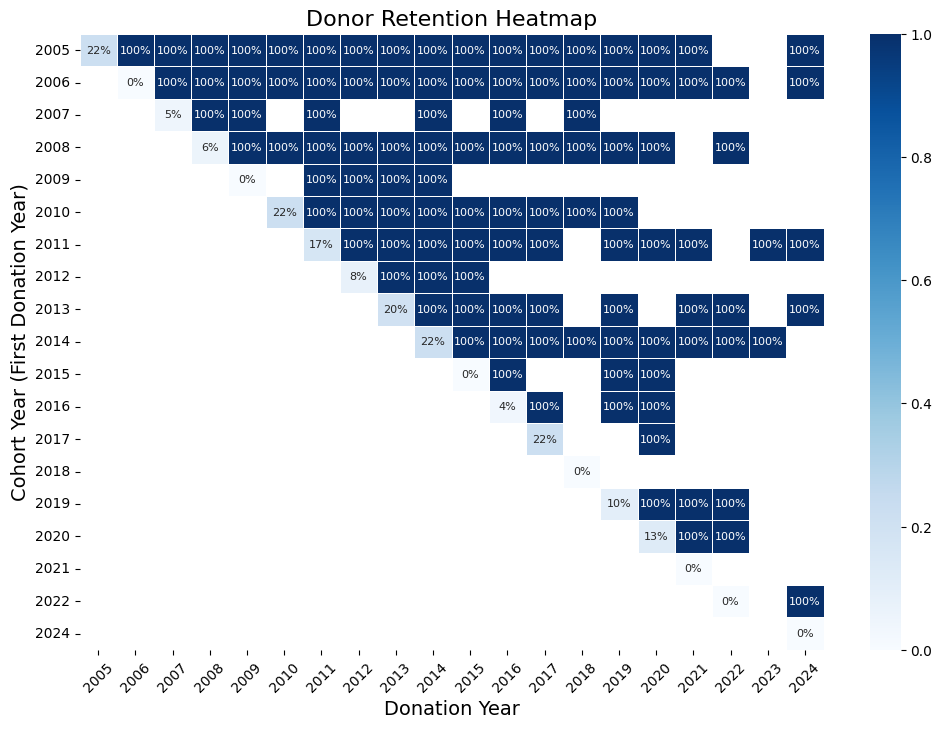

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convert years to integers (removes the .0 issue)
df_donor_retention["cohort_year"] = df_donor_retention["cohort_year"].astype(int)
df_donor_retention["donor_year"] = df_donor_retention["donor_year"].astype(int)

# Pivot the DataFrame for heatmap visualization
retention_matrix = df_donor_retention.pivot(index="cohort_year", columns="donor_year", values="retention_rate")

# Create the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(
    retention_matrix, 
    annot=True, 
    fmt=".0%", 
    cmap="Blues", 
    linewidths=0.5,
    annot_kws={"size": 8}  # Reduce font size inside heatmap
)

# Improve axis labels
plt.xlabel("Donation Year", fontsize=14)
plt.ylabel("Cohort Year (First Donation Year)", fontsize=14)
plt.title("Donor Retention Heatmap", fontsize=16)
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.yticks(rotation=0)

plt.show()


Understanding donor retention is crucial for assessing the long-term financial stability of MWPCCC. Retaining donors over multiple years indicates sustained community engagement and reduces the cost of acquiring new donors. Our year-over-year retention rate analysis highlights key trends in donor behavior, while the cohort retention heatmap provides a visual representation of donor engagement over time.

#### Key Findings:
📉 **Significant Drop in Retention (2020)**
The retention rate dropped dramatically to 9.88% in 2020, suggesting a major decline in returning donors.
While this coincides with the COVID-19 pandemic, external factors such as leadership turnover and organizational turmoil likely contributed to fundraising disruptions.

📊 **New Donor Spike (2020)**
Despite the retention decline, 2020 saw a sharp increase in new donors, jumping from 27 donors in 2019 to 81 in 2020.
However, this was not a lasting trend, as the number of donors fell back to 8 in both 2021 and 2022.
This suggests that while the community responded during a crisis, the organization did not effectively retain these new donors in the following years.

📈 **Historical Donor Retention (Overall)**
Across the entire dataset, 33.4% of donors have been repeat donors.
This is a relatively strong retention rate, possibly reflecting deep community investment in the organization.
However, the sharp decline in returning donors in 2020 and beyond may indicate a loss of trust, reduced outreach, or disengagement from the donor base.

🌡 **Heatmap Insights: Declining Engagement in Recent Years**
The heatmap visualization reinforces these trends, showing a steep drop-off in return donors in recent years.
Earlier cohorts maintained more stable engagement, whereas post-2020 donor retention has been weak.

#### Implications for Fundraising Strategy:

✅ Re-engagement Efforts Needed – Many donors who gave in 2020 did not return. Identifying and reconnecting with them could rebuild donor confidence.
✅ Stronger Stewardship Programs – Retention rates suggest that targeted outreach and donor appreciation efforts could help sustain engagement.
✅ Post-Pandemic Strategy Shift – The organization needs a renewed focus on long-term donor cultivation, beyond crisis-driven fundraising.

### 6.5 Contribution Breakdown by Donor Type

While donor retention provides insight into how consistently supporters give over time, understanding who these donors are is equally important. MWPCCC receives contributions from both individual donors and corporate entities, and analyzing this breakdown helps us refine fundraising strategies.

By examining the proportion of individual vs. corporate contributions, we can determine:

1. Whether we rely more on grassroots community support or large institutional donors
2. If there are opportunities to expand corporate partnerships or grow individual giving programs
3. How donor type impacts fundraising stability and sustainability

Next, we analyze the total contributions from individual and corporate donors to identify which donor group contributes the most and how this balance has shifted over time. We'll calculate the total amount donated by each donor type (individual vs. corporate) and their percentage share of overall contributions.

In [21]:
df_8 = _dntk.execute_sql(
  'SELECT \n    donor_type, \n    COUNT(donation_id) AS total_donations,\n    SUM(amount) AS total_amount,\n    (SUM(amount) * 100.0 / (SELECT SUM(amount) FROM donations)) AS percentage_of_total\nFROM donations\nGROUP BY donor_type\nORDER BY total_amount DESC;\n',
  'SQL_E4DCF937_C563_48B9_9A84_797D4F833EEA',
  audit_sql_comment='',
  sql_cache_mode='cache_disabled',
  return_variable_type='dataframe'
)
df_8

,donor_type,total_donations,total_amount,percentage_of_total
0,Personal,963,283564.57,71.748142
1,Corporate,257,58875.14,14.896720
2,Foundation,48,33148.16,8.387222
3,Political,16,19634.31,4.967917


In [22]:
_dntk.DeepnoteChart(df_8, """{"layer":[{"layer":[{"mark":{"clip":true,"type":"arc","tooltip":true,"innerRadius":{"expr":"0"},"outerRadius":{"expr":"min(width, height) / 2"}},"encoding":{"color":{"axis":{"grid":false},"sort":null,"type":"nominal","field":"donor_type","scale":{"scheme":"deepnote10"}},"order":{"axis":{"grid":false},"sort":"descending","type":"quantitative","field":"total_donations","scale":{"type":"linear"},"format":{"type":"default","decimals":null},"aggregate":"sum","formatType":"numberFormatFromNumberType"},"theta":{"axis":{"grid":false},"sort":null,"type":"quantitative","field":"total_donations","scale":{"type":"linear"},"stack":true,"format":{"type":"default","decimals":null},"aggregate":"sum","formatType":"numberFormatFromNumberType"},"tooltip":[{"axis":{"grid":false},"sort":null,"type":"nominal","field":"donor_type","scale":{"scheme":"deepnote10"}},{"sort":null,"type":"quantitative","field":"total_donations","aggregate":"sum"}]}},{"mark":{"dx":0,"dy":-1,"fill":"black","type":"text","align":"center","radius":{"expr":"min(width, height) / 2 - 50"},"baseline":"bottom"},"encoding":{"text":{"sort":null,"type":"quantitative","field":"total_donations","aggregate":"sum"},"color":{"axis":{"grid":false},"sort":null,"type":"nominal","field":"donor_type","scale":{"scheme":"deepnote10"}},"order":{"axis":{"grid":false},"sort":"descending","type":"quantitative","field":"total_donations","scale":{"type":"linear"},"format":{"type":"default","decimals":null},"aggregate":"sum","formatType":"numberFormatFromNumberType"},"theta":{"axis":{"grid":false},"sort":null,"type":"quantitative","field":"total_donations","scale":{"type":"linear"},"stack":true,"format":{"type":"default","decimals":null},"aggregate":"sum","formatType":"numberFormatFromNumberType"},"tooltip":[{"axis":{"grid":false},"sort":null,"type":"nominal","field":"donor_type","scale":{"scheme":"deepnote10"}},{"sort":null,"type":"quantitative","field":"total_donations","aggregate":"sum"}]}}]}],"title":"Number of Donations","config":{"legend":{}},"$schema":"https://vega.github.io/schema/vega-lite/v5.json","encoding":{},"usermeta":{"tooltipDefaultMode":true}}""")

In [23]:
_dntk.DeepnoteChart(df_8, """{"layer":[{"layer":[{"mark":{"clip":true,"type":"arc","tooltip":true,"innerRadius":{"expr":"0"},"outerRadius":{"expr":"min(width, height) / 2"}},"encoding":{"color":{"axis":{"grid":false},"sort":null,"type":"nominal","field":"donor_type","scale":{"scheme":"deepnote10"}},"order":{"axis":{"grid":false},"sort":"descending","type":"quantitative","field":"total_amount","scale":{"type":"linear"},"format":{"type":"default","decimals":null},"aggregate":"sum","formatType":"numberFormatFromNumberType"},"theta":{"axis":{"grid":false},"sort":null,"type":"quantitative","field":"total_amount","scale":{"type":"linear"},"stack":true,"format":{"type":"default","decimals":null},"aggregate":"sum","formatType":"numberFormatFromNumberType"},"tooltip":[{"axis":{"grid":false},"sort":null,"type":"nominal","field":"donor_type","scale":{"scheme":"deepnote10"}},{"sort":null,"type":"quantitative","field":"total_amount","aggregate":"sum"}]}},{"mark":{"dx":0,"dy":-1,"fill":"black","type":"text","align":"center","radius":{"expr":"min(width, height) / 2 - 50"},"baseline":"bottom"},"encoding":{"text":{"sort":null,"type":"quantitative","field":"total_amount","aggregate":"sum"},"color":{"axis":{"grid":false},"sort":null,"type":"nominal","field":"donor_type","scale":{"scheme":"deepnote10"}},"order":{"axis":{"grid":false},"sort":"descending","type":"quantitative","field":"total_amount","scale":{"type":"linear"},"format":{"type":"default","decimals":null},"aggregate":"sum","formatType":"numberFormatFromNumberType"},"theta":{"axis":{"grid":false},"sort":null,"type":"quantitative","field":"total_amount","scale":{"type":"linear"},"stack":true,"format":{"type":"default","decimals":null},"aggregate":"sum","formatType":"numberFormatFromNumberType"},"tooltip":[{"axis":{"grid":false},"sort":null,"type":"nominal","field":"donor_type","scale":{"scheme":"deepnote10"}},{"sort":null,"type":"quantitative","field":"total_amount","aggregate":"sum"}]}}]}],"title":"Total Raised","config":{"legend":{}},"$schema":"https://vega.github.io/schema/vega-lite/v5.json","encoding":{},"usermeta":{"tooltipDefaultMode":true}}""")

In [24]:
_dntk.DeepnoteChart(df_8, """{"layer":[{"layer":[{"mark":{"clip":true,"type":"arc","tooltip":true,"innerRadius":{"expr":"0"},"outerRadius":{"expr":"min(width, height) / 2"}},"encoding":{"color":{"axis":{"grid":false},"sort":null,"type":"nominal","field":"donor_type","scale":{"scheme":"deepnote10"}},"order":{"axis":{"grid":false},"sort":"descending","type":"quantitative","field":"percentage_of_total","scale":{"type":"linear"},"format":{"type":"default","decimals":null},"aggregate":"sum","formatType":"numberFormatFromNumberType"},"theta":{"axis":{"grid":false},"sort":null,"type":"quantitative","field":"percentage_of_total","scale":{"type":"linear"},"stack":true,"format":{"type":"default","decimals":null},"aggregate":"sum","formatType":"numberFormatFromNumberType"},"tooltip":[{"axis":{"grid":false},"sort":null,"type":"nominal","field":"donor_type","scale":{"scheme":"deepnote10"}},{"sort":null,"type":"quantitative","field":"percentage_of_total","format":".0%","aggregate":"sum"}]},"transform":[{"frame":[null,null],"window":[{"as":"deepnote_percentage_custom_field_percentage_total","op":"sum","field":"percentage_of_total"}]},{"as":"percentage_of_total","calculate":"datum[\\\\'percentage_of_total\\\\'] / datum[\\\\'deepnote_percentage_custom_field_percentage_total\\\\']"}]},{"mark":{"dx":0,"dy":-1,"fill":"black","type":"text","align":"center","radius":{"expr":"min(width, height) / 2 - 50"},"baseline":"bottom"},"encoding":{"text":{"sort":null,"type":"quantitative","field":"percentage_of_total","format":".0%","aggregate":"sum"},"color":{"axis":{"grid":false},"sort":null,"type":"nominal","field":"donor_type","scale":{"scheme":"deepnote10"}},"order":{"axis":{"grid":false},"sort":"descending","type":"quantitative","field":"percentage_of_total","scale":{"type":"linear"},"format":{"type":"default","decimals":null},"aggregate":"sum","formatType":"numberFormatFromNumberType"},"theta":{"axis":{"grid":false},"sort":null,"type":"quantitative","field":"percentage_of_total","scale":{"type":"linear"},"stack":true,"format":{"type":"default","decimals":null},"aggregate":"sum","formatType":"numberFormatFromNumberType"},"tooltip":[{"axis":{"grid":false},"sort":null,"type":"nominal","field":"donor_type","scale":{"scheme":"deepnote10"}},{"sort":null,"type":"quantitative","field":"percentage_of_total","format":".0%","aggregate":"sum"}]},"transform":[{"frame":[null,null],"window":[{"as":"deepnote_percentage_custom_field_percentage_total","op":"sum","field":"percentage_of_total"}]},{"as":"percentage_of_total","calculate":"datum[\\\\'percentage_of_total\\\\'] / datum[\\\\'deepnote_percentage_custom_field_percentage_total\\\\']"}]}]}],"title":"Donation Types by Percentage","config":{"legend":{}},"$schema":"https://vega.github.io/schema/vega-lite/v5.json","encoding":{},"usermeta":{"tooltipDefaultMode":true}}""")

To track how individual vs. corporate giving has changed over time, we’ll group donations by year and donor type, summing up the total amount contributed by each group. This will allow us to visualize trends in donor behavior and assess whether corporate or individual support has grown or declined over the years.

In [25]:
df_9 = _dntk.execute_sql(
  'SELECT \n    EXTRACT(YEAR FROM donation_date) AS donation_year,\n    donor_type,\n    COUNT(donation_id) AS total_donations,\n    SUM(amount) AS total_amount\nFROM donations\nWHERE donor_type IS NOT NULL\nGROUP BY donation_year, donor_type\nORDER BY donation_year ASC, total_amount DESC;\n',
  'SQL_E4DCF937_C563_48B9_9A84_797D4F833EEA',
  audit_sql_comment='',
  sql_cache_mode='cache_disabled',
  return_variable_type='dataframe'
)
df_9

,donation_year,donor_type,total_donations,total_amount
0,2005.0,Personal,17,11036.10
1,2005.0,Corporate,11,7269.75
2,2005.0,Foundation,3,1800.00
3,2006.0,Personal,44,21834.89
4,2006.0,Corporate,6,1129.74
...,...,...,...,...
56,2022.0,Personal,10,672.00
57,2023.0,Personal,2,1430.00
58,2023.0,Corporate,6,368.44
59,2024.0,Personal,8,2231.60


In [26]:
_dntk.DeepnoteChart(df_9, """{"layer":[{"layer":[{"mark":{"clip":true,"type":"bar","tooltip":true},"encoding":{"x":{"axis":{"grid":false,"title":"Year"},"sort":null,"type":"quantitative","field":"donation_year","scale":{"type":"linear"},"format":{"type":"default","decimals":null},"formatType":"numberFormatFromNumberType"},"y":{"axis":{"grid":false,"title":"Amount Raised"},"sort":null,"type":"quantitative","field":"total_amount","scale":{"type":"linear"},"format":{"type":"default","decimals":null},"aggregate":"sum","formatType":"numberFormatFromNumberType"},"color":{"sort":null,"type":"nominal","field":"donor_type","scale":{"scheme":"deepnote10"}}}}]}],"title":"Trends in Donor Behavior","config":{"legend":{}},"$schema":"https://vega.github.io/schema/vega-lite/v5.json","encoding":{},"usermeta":{"tooltipDefaultMode":true}}""")

#### Shifts in Donor Contribution Patterns Over Time
The data confirms that MWPCCC has historically relied on individual donors, which aligns with expectations—most contributions come from parents, alumni, and local community members rather than corporate sponsors.

However, we see a small but notable spike in corporate and political giving in 2018 and 2019. This increase likely correlates with a concerted push for broader community fundraising, particularly tied to the Fun and Sun picnic events held in those years. These events seem to have successfully attracted local businesses, political figures, and larger-scale donors, indicating that community-driven, public-facing events can be effective in engaging a wider network of supporters.

Despite this, corporate and political donations dropped off significantly after 2019, reinforcing the continued dominance of private, individual contributions. The trends suggest that MWPCCC has struggled to retain institutional support, potentially due to shifts in leadership, outreach strategies, or external economic pressures.

##### Key Takeaways:
📌 MWPCCC’s fundraising remains heavily reliant on individual donors – a strength for community engagement but a risk in terms of financial sustainability.
📌 Corporate and political giving increased in 2018-2019 but was not sustained, suggesting that event-driven fundraising efforts have short-term benefits but lack long-term retention strategies.
📌 Future fundraising efforts should consider a hybrid approach, leveraging community events to engage larger donors while implementing strategies to retain and grow corporate sponsorships over time.

### 6.6 Distribution of Donation Amounts

While understanding who contributes to MWPCCC’s fundraising efforts is essential, it is equally important to examine how much donors typically give. A deeper look at donation amounts over time can help identify key patterns:

1. Are donations primarily small, recurring contributions, or do they rely on a few large gifts?
2. Has the distribution of donation sizes changed over time?
3. Are there any outliers or notable trends that could inform future fundraising strategies?

By analyzing the distribution of donation amounts, we can assess whether MWPCCC’s fundraising strategy has effectively diversified its donor base or if it remains overly dependent on high-value donors.

To analyze the distribution of donation amounts, we'll categorize donations into different size ranges. This will help us determine whether MWPCCC relies more on small, mid-sized, or large donations.

In [27]:
df_10 = _dntk.execute_sql(
  'SELECT \n    CASE \n        WHEN amount < 50 THEN \'Under $50\'\n        WHEN amount >= 50 AND amount < 100 THEN \'$50 - $99\'\n        WHEN amount >= 100 AND amount < 250 THEN \'$100 - $249\'\n        WHEN amount >= 250 AND amount < 500 THEN \'$250 - $499\'\n        WHEN amount >= 500 AND amount < 1000 THEN \'$500 - $999\'\n        WHEN amount >= 1000 AND amount < 5000 THEN \'$1,000 - $4,999\'\n        WHEN amount >= 5000 THEN \'$5,000+\'\n        ELSE \'Unknown\'\n    END AS donation_range,\n    COUNT(*) AS donation_count,\n    SUM(amount) AS total_amount\nFROM donations\nGROUP BY donation_range\nORDER BY MIN(amount);\n',
  'SQL_E4DCF937_C563_48B9_9A84_797D4F833EEA',
  audit_sql_comment='',
  sql_cache_mode='cache_disabled',
  return_variable_type='dataframe'
)
df_10

,donation_range,donation_count,total_amount
0,Under $50,322,6959.75
1,$50 - $99,284,17956.26
2,$100 - $249,386,51894.93
3,$250 - $499,106,34961.35
4,$500 - $999,88,55916.71
5,"$1,000 - $4,999",84,137033.18
6,"$5,000+",14,90500.00


In [28]:
_dntk.DeepnoteChart(df_10, """{"layer":[{"layer":[{"mark":{"clip":true,"type":"bar","tooltip":true},"encoding":{"x":{"axis":{"grid":false,"title":"Donation Ranges"},"sort":null,"type":"nominal","field":"donation_range","scale":{"type":"linear"}},"y":{"axis":{"grid":false,"title":"Donation Count"},"sort":null,"type":"quantitative","field":"donation_count","scale":{"type":"linear"},"format":{"type":"default","decimals":null},"aggregate":"sum","formatType":"numberFormatFromNumberType"},"color":{"sort":null,"type":"quantitative","field":"total_amount","scale":{"scheme":"deepnote_blues"}}}}]}],"title":"","config":{"legend":{}},"$schema":"https://vega.github.io/schema/vega-lite/v5.json","encoding":{},"usermeta":{"tooltipDefaultMode":true}}""")

To better understand donor giving behavior, we categorized donations into different size brackets and analyzed their frequency and total contribution.

#### Key Findings:
🔹 The most common donation size was between \$100 and \$249, with 386 donations in this range, more than any other category.
🔹 The largest revenue-generating segment was donations between \$1,000 and \$4,999, contributing a total of \$137,033 across only 84 donations—suggesting that major gifts, while fewer in number, play a critical role in fundraising.
🔹 Mid-range donations (\$500–\$999) also played a significant role, with 88 donations amounting to over \$55,000 in total.
🔹 While small donations under \$50 were expected to dominate, they were less common than mid-range contributions, reinforcing the idea that slightly larger gifts (above \$100) are both accessible and highly valuable to the organization.

This data suggests an opportunity to encourage mid-level giving strategies—targeting donors who are willing to give at least \$100–\$250, while also continuing to steward larger gifts.

#### 6.6.1 Recommended Action Plan: Optimizing Donor Engagement
Based on the donation distribution analysis, MWPCCC can implement targeted fundraising strategies to encourage mid-level giving and steward major donors more effectively.

1️⃣ Strengthen Mid-Level Giving (\$100–\$250)
✔ Create a "Sustainer Circle" for donors who commit to giving at least \$100 annually—offering recognition in newsletters, exclusive event invitations, or small tokens of appreciation.
✔ Emphasize impact-driven messaging in fundraising appeals, showcasing what a \$100–\$250 donation directly funds (e.g., classroom materials, teacher training, outdoor play equipment).
✔ Introduce "Challenge Matches" where board members or major donors match gifts in this range to incentivize giving.

2️⃣ Increase Major Donor Stewardship (\$1,000+)
✔ Develop a personalized outreach plan for donors in the \$1,000+ category—offering one-on-one engagement opportunities, impact reports, and invitations to special events.
✔ Identify potential major donors among existing mid-level donors who have given multiple times in the \$100–\$500 range—targeting them for personalized cultivation.
✔ Explore grant funding and sponsorship opportunities to supplement large-gift fundraising.

3️⃣ Encourage Recurring Giving
✔ Launch a "Sustainable Supporter" program encouraging donors to contribute monthly at a mid-level tier (e.g., \$10/month = \$120 annually).
✔ Make recurring donations the default option in online giving platforms, making it easy for donors to commit to ongoing support.

4️⃣ Strengthen Small-Dollar Donor Engagement (\$50 & Under)
✔ Engage small donors through crowdfunding campaigns that leverage social media and peer-to-peer fundraising.
✔ Recognize all donors, regardless of gift size, by emphasizing community involvement and collective impact.

By strategically nurturing mid-level donors and building relationships with high-value supporters, MWPCCC can increase fundraising sustainability while ensuring that donors at all levels feel engaged and appreciated.

### 6.7 Largest Single and Cumulative Donors

While analyzing the distribution of donation amounts helps us understand general giving patterns, it’s also essential to identify the largest contributors to MWPCCC’s fundraising efforts. A nonprofit’s financial health often depends on a mix of small, recurring donations and larger one-time contributions from key donors.

In this section, we examine:

🔹 The largest single donations recorded in the database.
🔹 The top cumulative donors, assessing whether their support has been consistent or occasional.

It’s important to note that all donor data has been anonymized to protect individual privacy. While the names presented here do not correspond to real individuals, the trends and insights remain fully representative of MWPCCC’s donor landscape.

Understanding these trends can help MWPCCC build stronger relationships with major donors while ensuring a balanced fundraising strategy that doesn’t rely too heavily on a few key contributors.

We start with a SQL query to identify the largest single donations.

In [29]:
df_11 = _dntk.execute_sql(
  'SELECT donation_id, entity_id, occupant_full_name, amount, donation_date, fundraiser_id\nFROM donations\nORDER BY amount DESC\nLIMIT 10;\n',
  'SQL_E4DCF937_C563_48B9_9A84_797D4F833EEA',
  audit_sql_comment='',
  sql_cache_mode='cache_disabled',
  return_variable_type='dataframe'
)
df_11

,donation_id,entity_id,occupant_full_name,amount,donation_date,fundraiser_id
0,FAM0043-20180910-0001,FAM0043,Eden Taylor 1315,10000.0,2018-09-10,In Pat's Memory
1,FAM0043-20201231-0001,FAM0043,Eden Taylor 1315,10000.0,2020-12-31,In Pat's Memory
2,FAM0043-20211231-0001,FAM0043,Eden Taylor 1315,10000.0,2021-12-31,In Pat's Memory
3,FAM0043-20191107-0001,FAM0043,Eden Taylor 1315,10000.0,2019-11-07,In Pat's Memory
4,MISC-20200430-0001,None,Misc. Parent,5500.0,2020-04-30,Sun & Fun Family Picnic 2019
5,FAM0043-20121226-0001,FAM0043,Milan Torres 1157,5000.0,2012-12-26,Letter Campaign 2012
6,FAM0043-20131218-0001,FAM0043,Milan Torres 1157,5000.0,2013-12-18,Letter Campaign 2013
7,FAM0043-20101223-0001,FAM0043,Milan Torres 1157,5000.0,2010-12-23,Letter Campaign 2010
8,FAM0043-20091215-0001,FAM0043,Milan Torres 1157,5000.0,2009-12-15,Letter Campaign 2009
9,FAM0043-20111223-0001,FAM0043,Milan Torres 1157,5000.0,2011-12-23,Letter Campaign 2011


In [30]:
_dntk.DeepnoteChart(df_11, """{"layer":[{"layer":[{"mark":{"clip":true,"type":"bar","color":"#2266D3","tooltip":true},"encoding":{"x":{"axis":{"grid":false,"title":"Donor"},"sort":null,"type":"nominal","field":"occupant_full_name","scale":{"type":"linear"}},"y":{"axis":{"grid":false,"title":"Donated"},"sort":null,"type":"quantitative","field":"amount","scale":{"type":"linear"},"format":{"type":"default","decimals":null},"aggregate":"sum","formatType":"numberFormatFromNumberType"}}}]}],"title":"Top Donors","config":{"legend":{}},"$schema":"https://vega.github.io/schema/vega-lite/v5.json","encoding":{},"usermeta":{"tooltipDefaultMode":true}}""")

In [31]:
_dntk.DeepnoteChart(df_11, """{"layer":[{"layer":[{"mark":{"clip":true,"type":"bar","tooltip":true},"encoding":{"x":{"axis":{"grid":false,"title":"Date of Donation"},"sort":null,"type":"nominal","field":"donation_date","scale":{"type":"linear"}},"y":{"axis":{"grid":false,"title":"Amount Donated"},"sort":null,"type":"quantitative","field":"amount","scale":{"type":"linear"},"format":{"type":"default","decimals":null},"aggregate":"sum","formatType":"numberFormatFromNumberType"},"color":{"sort":null,"type":"nominal","field":"occupant_full_name","scale":{"scheme":"deepnote10"}},"xOffset":{"sort":null,"type":"nominal","field":"occupant_full_name"}}}]}],"title":"Top Donations Over Time","config":{"legend":{}},"$schema":"https://vega.github.io/schema/vega-lite/v5.json","encoding":{},"usermeta":{"tooltipDefaultMode":true}}""")

Our analysis of the largest single donations to MWPCCC revealed an interesting trend—a single giving entity has consistently provided substantial financial support over multiple years. These donors have contributed approximately \$10,000 annually for five years, with an additional \$5,000 annually from another individual within the same entity. This level of giving suggests a deep connection to the organization, but it also raises concerns about dependency on a small number of major donors. Additionally, we found one large anonymous donation, highlighting gaps in historical donor tracking.

To further explore the impact of high-value donors, we will now examine cumulative donor contributions over time to see how many donors have provided significant long-term support.

This query will: 
✅ Sum all donations per donor (entity_id)
✅ Rank donors by total contributions
✅ Include donor type (individual vs. corporate) for additional insights

In [32]:
df_12 = _dntk.execute_sql(
  'SELECT \n    d.entity_id, \n    ge.entity_name,\n    ge.entity_type,\n    COUNT(d.donation_id) AS num_donations,\n    SUM(d.amount) AS total_donated\nFROM donations d\nJOIN giving_entities ge ON d.entity_id = ge.entity_id\nGROUP BY d.entity_id, ge.entity_name, ge.entity_type\nORDER BY total_donated DESC;\n',
  'SQL_E4DCF937_C563_48B9_9A84_797D4F833EEA',
  audit_sql_comment='',
  sql_cache_mode='cache_disabled',
  return_variable_type='dataframe'
)
df_12

,entity_id,entity_name,entity_type,num_donations,total_donated
0,FAM0043,Blake Scott and Eden Taylor,Family,29,102826.66
1,FAM0902,Payton White and Jamie Brown,Family,37,21255.56
2,UNK1548,Midland Fundraising,Corporate Donor,33,16463.19
3,UNK1560,Self Realization Fellowship Church,Corporate Donor,17,14600.00
4,UNK1542,Lifetouch National School Studios,Corporate Donor,84,12098.20
...,...,...,...,...,...
285,FAM1441,Eden Nguyen and Sawyer Stewart,Family,1,10.00
286,UNK1556,"RMS Communications Group, Inc.",Corporate Donor,1,10.00
287,IND1426,Riley Lewis,Individual,1,10.00
288,IND1443,Spencer Allen,Individual,1,4.00


In [33]:
_dntk.DeepnoteChart(df_12, """{"layer":[{"layer":[{"mark":{"clip":true,"type":"arc","tooltip":true,"innerRadius":{"expr":"0"},"outerRadius":{"expr":"min(width, height) / 2"}},"encoding":{"color":{"axis":{"grid":false},"sort":null,"type":"nominal","field":"entity_type","scale":{"scheme":"deepnote10"}},"order":{"axis":{"grid":false},"sort":"descending","type":"quantitative","field":"total_donated","scale":{"type":"linear"},"format":{"type":"default","decimals":null},"aggregate":"sum","formatType":"numberFormatFromNumberType"},"theta":{"axis":{"grid":false},"sort":null,"type":"quantitative","field":"total_donated","scale":{"type":"linear"},"stack":true,"format":{"type":"default","decimals":null},"aggregate":"sum","formatType":"numberFormatFromNumberType"},"tooltip":[{"axis":{"grid":false},"sort":null,"type":"nominal","field":"entity_type","scale":{"scheme":"deepnote10"}},{"sort":null,"type":"quantitative","field":"total_donated","format":".0%","aggregate":"sum"}]},"transform":[{"frame":[null,null],"window":[{"as":"deepnote_percentage_custom_field_percentage_total","op":"sum","field":"total_donated"}]},{"as":"total_donated","calculate":"datum[\\\\'total_donated\\\\'] / datum[\\\\'deepnote_percentage_custom_field_percentage_total\\\\']"}]},{"mark":{"dx":0,"dy":-1,"fill":"black","type":"text","align":"center","radius":{"expr":"min(width, height) / 2 - 50"},"baseline":"bottom"},"encoding":{"text":{"sort":null,"type":"quantitative","field":"total_donated","format":".0%","aggregate":"sum"},"color":{"axis":{"grid":false},"sort":null,"type":"nominal","field":"entity_type","scale":{"scheme":"deepnote10"}},"order":{"axis":{"grid":false},"sort":"descending","type":"quantitative","field":"total_donated","scale":{"type":"linear"},"format":{"type":"default","decimals":null},"aggregate":"sum","formatType":"numberFormatFromNumberType"},"theta":{"axis":{"grid":false},"sort":null,"type":"quantitative","field":"total_donated","scale":{"type":"linear"},"stack":true,"format":{"type":"default","decimals":null},"aggregate":"sum","formatType":"numberFormatFromNumberType"},"tooltip":[{"axis":{"grid":false},"sort":null,"type":"nominal","field":"entity_type","scale":{"scheme":"deepnote10"}},{"sort":null,"type":"quantitative","field":"total_donated","format":".0%","aggregate":"sum"}]},"transform":[{"frame":[null,null],"window":[{"as":"deepnote_percentage_custom_field_percentage_total","op":"sum","field":"total_donated"}]},{"as":"total_donated","calculate":"datum[\\\\'total_donated\\\\'] / datum[\\\\'deepnote_percentage_custom_field_percentage_total\\\\']"}]}]}],"title":"Donors by Type","config":{"legend":{}},"$schema":"https://vega.github.io/schema/vega-lite/v5.json","encoding":{},"usermeta":{"tooltipDefaultMode":true}}""")

In [34]:
# SETTING UP POSTGRES CONNECTION:
# After this block has run, the "engine_mwpccc_supabase_pgsql" variable will be available
# in the next blocks to interact with the database.
from sqlalchemy import create_engine
from sqlalchemy.engine.url import URL
import os
engine_mwpccc_supabase_pgsql = create_engine(URL.create(
  "postgresql+psycopg2",
  username=os.environ["MWPCCC_SUPABASE_USER"],
  password=os.environ["MWPCCC_SUPABASE_PASSWORD"],
  host=os.environ["MWPCCC_SUPABASE_HOST"],
  port=os.environ["MWPCCC_SUPABASE_PORT"],
  database=os.environ["MWPCCC_SUPABASE_DATABASE"],
))

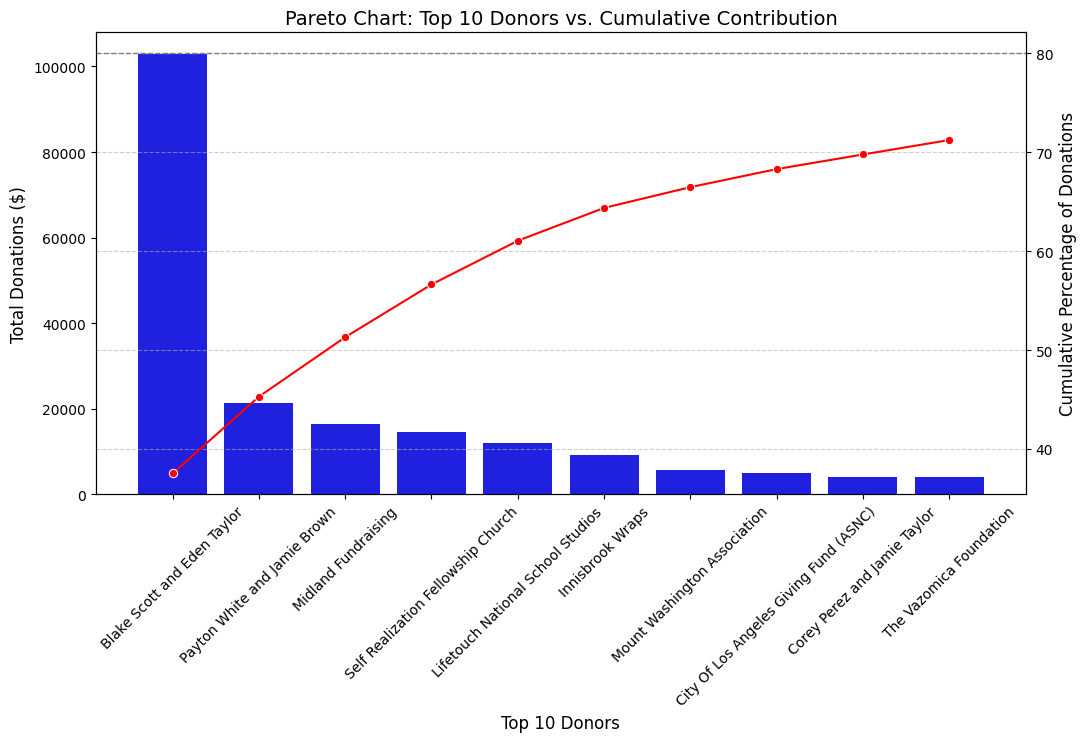

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# SQL Query to retrieve donor contributions
query = """
SELECT entity_name, SUM(amount) AS total_donated
FROM donations
JOIN giving_entities ON donations.entity_id = giving_entities.entity_id
GROUP BY entity_name
ORDER BY total_donated DESC
"""
df_donations = pd.io.sql.read_sql_query(query, engine_mwpccc_supabase_pgsql)

# Sort and calculate cumulative percentage
df_donations = df_donations.sort_values(by="total_donated", ascending=False)
df_donations["cumulative_sum"] = df_donations["total_donated"].cumsum()
df_donations["cumulative_percentage"] = 100 * df_donations["cumulative_sum"] / df_donations["total_donated"].sum()

# Set up figure
fig, ax1 = plt.subplots(figsize=(12,6))

# Bar chart for donor contributions
sns.barplot(x=df_donations["entity_name"][:10], y=df_donations["total_donated"][:10], color="blue", ax=ax1)
ax1.set_ylabel("Total Donations ($)", fontsize=12)
ax1.set_xlabel("Top 10 Donors", fontsize=12)
ax1.tick_params(axis="x", rotation=45)

# Line chart for cumulative percentage
ax2 = ax1.twinx()
sns.lineplot(x=df_donations["entity_name"][:10], y=df_donations["cumulative_percentage"][:10], color="red", marker="o", ax=ax2)
ax2.set_ylabel("Cumulative Percentage of Donations", fontsize=12)
ax2.axhline(y=80, color="gray", linestyle="dashed", linewidth=1)  # 80% reference line

# Titles
plt.title("Pareto Chart: Top 10 Donors vs. Cumulative Contribution", fontsize=14)
plt.grid(True, linestyle="--", alpha=0.6)

# Show Plot
plt.show()


#### How to Interpret This Chart:
Bars (blue): Show the absolute contribution amount of each top donor.
Line (red): Shows the cumulative percentage of total donations contributed by these donors.
Dashed line at 80%: Helps determine how many donors make up 80% of all donations (Pareto Principle).

The Pareto principle (80/20 rule) suggests that a small percentage of donors contribute the majority of the funds. However, our initial analysis shows that even the top 10 donors only account for ~72% of total donations, meaning our fundraising structure may be more balanced than expected.

To gain a clearer picture of how MWPCCC's donor contributions are distributed, we will:
1️⃣ Expand our analysis beyond the top 10 donors to see when (or if) the cumulative total reaches 80%.
2️⃣ Assess whether mid-level and smaller donors contribute more than anticipated and identify potential fundraising opportunities.
3️⃣ Determine if we are over-reliant on a few donors or if our donor base is more diversified than initially assumed.

By running this extended analysis, we aim to better understand the full distribution of donor contributions and identify where to focus future fundraising efforts.

In [36]:
# SETTING UP POSTGRES CONNECTION:
# After this block has run, the "engine_mwpccc_supabase_pgsql" variable will be available
# in the next blocks to interact with the database.
from sqlalchemy import create_engine
from sqlalchemy.engine.url import URL
import os
engine_mwpccc_supabase_pgsql = create_engine(URL.create(
  "postgresql+psycopg2",
  username=os.environ["MWPCCC_SUPABASE_USER"],
  password=os.environ["MWPCCC_SUPABASE_PASSWORD"],
  host=os.environ["MWPCCC_SUPABASE_HOST"],
  port=os.environ["MWPCCC_SUPABASE_PORT"],
  database=os.environ["MWPCCC_SUPABASE_DATABASE"],
))

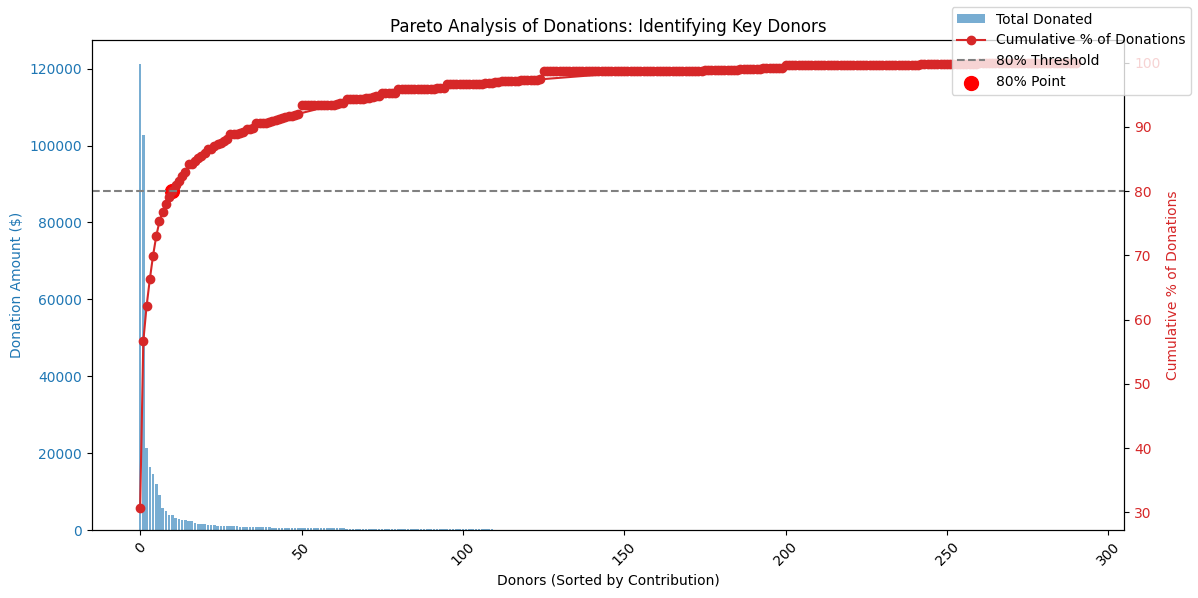

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define the SQL query
query = """
WITH DonorContributions AS (
    SELECT 
        entity_id, 
        SUM(amount) AS total_donated
    FROM donations
    GROUP BY entity_id
),
RankedDonors AS (
    SELECT 
        entity_id, 
        total_donated,
        SUM(total_donated) OVER (ORDER BY total_donated DESC) AS cumulative_donations,
        SUM(total_donated) OVER () AS total_funds
    FROM DonorContributions
)
SELECT 
    entity_id,
    total_donated,
    cumulative_donations,
    total_funds,
    (cumulative_donations / total_funds) * 100 AS cumulative_percentage
FROM RankedDonors
ORDER BY total_donated DESC;
"""

# Execute query and store in DataFrame
df_pareto = pd.read_sql(query, engine_mwpccc_supabase_pgsql)

# Sort donors by total donated
df_pareto = df_pareto.sort_values(by="total_donated", ascending=False)

# Create the plot
fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar chart - Individual donations
color = "tab:blue"
ax1.bar(df_pareto.index, df_pareto["total_donated"], color=color, alpha=0.6, label="Total Donated")
ax1.set_xlabel("Donors (Sorted by Contribution)")
ax1.set_ylabel("Donation Amount ($)", color=color)
ax1.tick_params(axis="y", labelcolor=color)
plt.xticks(rotation=45)

# Line chart - Cumulative percentage
ax2 = ax1.twinx()
color = "tab:red"
ax2.plot(df_pareto.index, df_pareto["cumulative_percentage"], color=color, marker="o", label="Cumulative % of Donations")
ax2.axhline(y=80, color="gray", linestyle="dashed", label="80% Threshold")
ax2.set_ylabel("Cumulative % of Donations", color=color)
ax2.tick_params(axis="y", labelcolor=color)

# Highlight the point where 80% threshold is met
threshold_index = (df_pareto["cumulative_percentage"] >= 80).idxmax()
ax2.scatter(threshold_index, df_pareto["cumulative_percentage"].loc[threshold_index], color="red", s=100, label="80% Point")

# Title and legend
plt.title("Pareto Analysis of Donations: Identifying Key Donors")
fig.tight_layout()
fig.legend(loc="upper right")

# Show the plot
plt.show()


#### Analysis: Concentration of Giving & Fundraising Sustainability
The Pareto analysis confirms that a small percentage of donors contribute the vast majority of total funds. Within the top 20 donors, we already reach the 80% cumulative contribution threshold, indicating a highly concentrated giving structure.

This suggests several key insights:

1️⃣ Fundraising Risk & Sustainability
MWPCCC relies heavily on a small group of major donors, meaning that even the loss of a few contributors could have a significant financial impact. This level of reliance underscores the need for long-term engagement strategies for high-value donors.

2️⃣ Opportunities for Mid-Tier Growth
While major donors carry much of the financial burden, mid-tier donors (giving between $100-$1,000) present an opportunity for growth. Expanding this segment could help reduce reliance on a few major contributors and increase financial stability.

3️⃣ Strategic Donor Engagement
The organization should prioritize strengthening relationships with its top donors, ensuring continued support through personal outreach, tailored updates, and exclusive engagement opportunities. At the same time, efforts should be made to encourage mid-tier donors to increase their giving, possibly through tiered recognition programs, matching incentives, or more targeted donation requests.

4️⃣ Cross-Referencing with Retention Data
A critical next step is to analyze whether these top donors are repeat contributors or one-time givers. If most of them are returning donors, retention efforts should focus on maintaining engagement over time. If many are one-time givers, this may indicate missed stewardship opportunities and a need for more effective post-donation follow-up.

#### Key Takeaway:
MWPCCC’s funding structure is heavily reliant on a small number of major donors, making long-term engagement crucial. However, mid-tier donors represent an opportunity for financial diversification, and targeted efforts should be made to both retain top donors and cultivate stronger mid-level giving.

### 6.8 Quantifying the Decline in Donor Support
The previous sections have made one fact clear: MWPCCC’s donor base has been shrinking, and overall giving has declined in recent years. Major gifts have helped sustain operations, but the loss of recurring donors and small contributions presents a serious challenge to long-term financial stability.

Here, we take a closer look at the numbers to quantify this decline more precisely. Instead of asking whether donor participation and revenue have fallen, we now ask:

1. How steep is the decline year-over-year?
2. At what point did donor engagement and giving peak, and how sharp was the drop-off?
3. Are these shifts consistent across all donor types, or are certain segments more affected?
4. What does this trend suggest about MWPCCC’s fundraising resilience and potential strategies for rebuilding support?

This analysis will provide a clear, data-driven foundation for future fundraising strategy, ensuring that MWPCCC can develop targeted solutions to counteract declining donor participation and revenue.


**SQL Query 1: Year-over-Year Donor Count**
This query calculates the total number of unique donors per year based on the donation_date.

In [38]:
df_13 = _dntk.execute_sql(
  'SELECT \n    EXTRACT(YEAR FROM donation_date) AS year, \n    COUNT(DISTINCT entity_id) AS unique_donors\nFROM donations\nGROUP BY year\nORDER BY year;\n',
  'SQL_E4DCF937_C563_48B9_9A84_797D4F833EEA',
  audit_sql_comment='',
  sql_cache_mode='cache_disabled',
  return_variable_type='dataframe'
)
df_13

,year,unique_donors
0,2005.0,9
1,2006.0,24
2,2007.0,32
3,2008.0,33
4,2009.0,24
5,2010.0,20
6,2011.0,41
7,2012.0,27
8,2013.0,29
9,2014.0,35


In [39]:
_dntk.DeepnoteChart(df_13, """{"layer":[{"layer":[{"mark":{"clip":true,"type":"trail","color":"#2266D3","tooltip":true},"encoding":{"x":{"axis":{"grid":false,"title":"Year"},"sort":null,"type":"quantitative","field":"year","scale":{"type":"linear","zero":false},"format":{"type":"default","decimals":null},"formatType":"numberFormatFromNumberType"},"y":{"axis":{"grid":false,"title":"Donors"},"sort":null,"type":"quantitative","field":"unique_donors","scale":{"type":"linear","zero":false},"format":{"type":"default","decimals":null},"formatType":"numberFormatFromNumberType"}}}]}],"title":"Donors Over Time","config":{"legend":{}},"$schema":"https://vega.github.io/schema/vega-lite/v5.json","encoding":{},"usermeta":{"tooltipDefaultMode":true}}""")

**SQL Query 2: Year-over-Year Total Revenue**
This query sums total donation revenue per year, allowing us to see overall trends in giving.

In [40]:
df_14 = _dntk.execute_sql(
  'SELECT \n    EXTRACT(YEAR FROM donation_date) AS year, \n    SUM(amount) AS total_donations\nFROM donations\nGROUP BY year\nORDER BY year;\n',
  'SQL_E4DCF937_C563_48B9_9A84_797D4F833EEA',
  audit_sql_comment='',
  sql_cache_mode='cache_disabled',
  return_variable_type='dataframe'
)
df_14

,year,total_donations
0,2005.0,20105.85
1,2006.0,24064.63
2,2007.0,14233.81
3,2008.0,20483.13
4,2009.0,20642.95
5,2010.0,18056.48
6,2011.0,23682.93
7,2012.0,26275.81
8,2013.0,20970.21
9,2014.0,20342.15


In [41]:
_dntk.DeepnoteChart(df_14, """{"layer":[{"layer":[{"mark":{"clip":true,"type":"trail","color":"#2266D3","tooltip":true},"encoding":{"x":{"axis":{"grid":false,"title":"Year"},"sort":null,"type":"quantitative","field":"year","scale":{"type":"linear","zero":false},"format":{"type":"default","decimals":null},"formatType":"numberFormatFromNumberType"},"y":{"axis":{"grid":false,"title":"Total Donations"},"sort":null,"type":"quantitative","field":"total_donations","scale":{"type":"linear","zero":false},"format":{"type":"default","decimals":null},"aggregate":"sum","formatType":"numberFormatFromNumberType"}}}]}],"title":"Donations over Time","config":{"legend":{}},"$schema":"https://vega.github.io/schema/vega-lite/v5.json","encoding":{},"usermeta":{"tooltipDefaultMode":true}}""")

The data reveals that the decline in donor count has been steeper than the decline in total donations, suggesting that donor retention efforts have helped sustain revenue despite a shrinking donor base. Additionally, we see that the peak in donations occurred a year before the peak in donor count, which could indicate that major donors contributed heavily before overall engagement began to decline.

Another key factor to consider is the historical approach to fundraising at MWPCCC. In previous years, individual centers operated their own fundraisers, fostering a steady stream of contributions. However, in an effort to reduce internal competition and improve staff morale, administrative leadership has moved toward centralizing fundraising efforts. This shift—while well-intentioned—has not yet resulted in a clear alternative fundraising strategy.

To further contextualize the decline in fundraising revenue, we examined how often MWPCCC has actively fundraised over the years. A high volume of fundraisers might indicate strong engagement efforts, whereas a lower frequency could suggest periods of inactivity or shifting organizational priorities.

In [42]:
df_16 = _dntk.execute_sql(
  'SELECT \n    EXTRACT(YEAR FROM f.date_started) AS year,\n    COUNT(f.fundraiser_id) AS total_fundraisers,\n    SUM(d.amount) AS total_fundraiser_revenue\nFROM fundraisers f\nLEFT JOIN donations d ON f.fundraiser_id = d.fundraiser_id\nWHERE f.fundraiser_id IS NOT NULL\nGROUP BY year\nORDER BY year;\n',
  'SQL_E4DCF937_C563_48B9_9A84_797D4F833EEA',
  audit_sql_comment='',
  sql_cache_mode='cache_disabled',
  return_variable_type='dataframe'
)
df_16

,year,total_fundraisers,total_fundraiser_revenue
0,2005.0,249,81036.68
1,2006.0,43,10250.78
2,2007.0,42,14158.75
3,2008.0,43,12816.66
4,2009.0,104,22958.22
5,2010.0,87,25706.66
6,2011.0,58,20686.50
7,2012.0,48,18230.48
8,2013.0,67,14068.04
9,2014.0,88,19265.97


In [43]:
_dntk.DeepnoteChart(df_16, """{"layer":[{"layer":[{"mark":{"clip":true,"type":"bar","tooltip":true},"encoding":{"x":{"axis":{"grid":false,"title":"Year"},"sort":null,"type":"quantitative","field":"year","scale":{"type":"linear"},"format":{"type":"default","decimals":null},"formatType":"numberFormatFromNumberType"},"y":{"axis":{"grid":false,"title":"Fundraisers"},"sort":null,"type":"quantitative","field":"total_fundraisers","scale":{"type":"linear"},"format":{"type":"default","decimals":null},"formatType":"numberFormatFromNumberType"},"color":{"sort":null,"type":"quantitative","field":"total_fundraiser_revenue","scale":{"scheme":"deepnote_blues"},"aggregate":"sum"}}}]}],"title":"Fundraisers Over Time","config":{"legend":{}},"$schema":"https://vega.github.io/schema/vega-lite/v5.json","encoding":{},"usermeta":{"tooltipDefaultMode":true}}""")

#### Analysis: Year-Over-Year Donor & Revenue Trends
The number of fundraisers per year has followed a steady decline, mirroring the downward trend in donor engagement and total revenue.

The busiest fundraising years coincided with the organization’s highest revenue totals, suggesting that consistent fundraising efforts directly impact financial success.

The sharp drop-off in fundraiser count in recent years aligns with the steep decline in donations—put simply, when MWPCCC stopped asking, donors stopped giving.

While external factors, like the pandemic and shifts in organizational leadership, likely played a role, the data suggests that proactive fundraising efforts matter more than we might have realized.

💡 Key Takeaway:
Fundraising isn’t just about getting lucky with a few generous donors—it requires consistent effort and engagement. The data makes one thing clear: when MWPCCC made fundraising a priority, donors responded. If we want to restore financial stability, we need to reinvest in active, strategic fundraising efforts.

#### Next Steps & Recommendations
1. **Reassess the current fundraising strategy:** Given that decentralization previously led to more frequent and successful fundraising efforts, a hybrid approach may be worth considering.
2. **Strengthen donor outreach:** Donors who continue to give despite declining engagement are valuable assets—targeted donor appreciation and retention strategies could help sustain giving levels.
3. **Increase fundraising visibility:** Ensure that fundraising remains an active and consistent part of MWPCCC’s communication and engagement efforts, rather than an afterthought.

## Summary & Key Takeaways
MWPCCC’s donor and fundraising data reveal a complex but clear pattern: fundraising efforts have been inconsistent, and donor engagement has declined in recent years. The steep drop in fundraising revenue, particularly after 2019, coincided with a decline in structured fundraising events and shifts in organizational priorities.

However, our analysis has uncovered some crucial insights that can help shape future strategy:

📌 **Donor Retention Matters:** Before 2020, about one-third of all donors returned for additional contributions—a solid base of support. But in 2020, retention dropped dramatically, suggesting that external factors (such as COVID-19 and leadership turnover) played a role in donor disengagement.

📌 **Fundraising Works—When It Happens:** Fundraisers with clear goals and community involvement, like the Noise Remediation Fundraiser, performed exceptionally well. In contrast, years with little structured fundraising saw lower engagement and revenue. The takeaway? You don’t get donations if you don’t ask for them.

📌 **Small Consistent Giving is a Big Deal:** While major donors made up the bulk of our total fundraising revenue, the most common donation amount was between \$100 and \$249—a range accessible to many community members. Encouraging recurring or mid-range donations could help stabilize fundraising income.

📌 **The Risk of Relying on a Few Big Donors:** Our Pareto analysis showed that a small percentage of donors have historically carried the bulk of our fundraising success. While this generosity is invaluable, it also makes the organization vulnerable to financial instability if just a few key donors stop giving.

## Moving Forward
The good news? We have data to guide better decision-making. By focusing on structured, engaging fundraisers, improving donor retention efforts, and making it easier for community members to contribute at sustainable levels, MWPCCC can rebuild a stronger fundraising foundation.

And on that note…

🌟 **Want to be part of the next success story?** 🌟
Donate to MWPCCC today and join my dataset! Your support helps keep early childhood education thriving—and, let’s be honest, it also helps make my next round of data analysis even more interesting. 😄

👉 [Donate here!](https://donorbox.org/mwpccc-annual-campaign)👈 